In [0]:
from pyspark.sql import SparkSession

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices_1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df1)
df1.head()

Out[4]: Row(year='2015', make='Kia', model='Sorento', trim='LX', body='SUV', transmission='automatic', vin='5xyktca69fg566472', state='ca', condition='5', odometer='16639', color='white', interior='black', seller='kia motors america, inc', mmr='20500', sellingprice='21500', saledate='Tue Dec 16 2014 12:30:00 GMT-0800 (PST)')

In [0]:
#df1.cache()
df1.printSchema()

root
 |-- year: string (nullable = true)
 |-- make: string (nullable = true)
 |-- model: string (nullable = true)
 |-- trim: string (nullable = true)
 |-- body: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- vin: string (nullable = true)
 |-- state: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- color: string (nullable = true)
 |-- interior: string (nullable = true)
 |-- seller: string (nullable = true)
 |-- mmr: string (nullable = true)
 |-- sellingprice: string (nullable = true)
 |-- saledate: string (nullable = true)



In [0]:
#removed vin, seller & saledate
dfreal = df1.selectExpr("cast(year as int) year",
                       "cast(make as string) make",
                       "cast(model as string) model",
                       "cast(trim as string) trim",
                       "cast(body as string) body",
                       "cast(transmission as string) transmission",
                       "cast(state as string) state",
                       "cast(condition as int) condition",
                       "cast(odometer as int) odometer",
                       "cast(color as string) color",
                       "cast(interior as string) interior",
                       "cast(mmr as int) mmr",
                       "cast(sellingprice as int) sellingprice")

In [0]:
#dimensions of data
dfreal.count(),len(dfreal.columns)


Out[7]: (139709, 13)

In [0]:
dfreal.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
year,139709,2009.454272809912,4.208330560846577,1984,2015
make,138816,None,None,Acura,vw
model,138789,781.5907663316583,795.1166806825477,1,yukon
trim,138492,342.9599756690999,790.2424256536412,!,zx3
body,135970,None,None,Access Cab,sedan
transmission,123515,None,None,automatic,manual
state,139709,None,None,ab,wi
condition,127917,2.8783273528928914,1.0265643893203333,1,5
odometer,139632,73380.25666752608,56946.733000252185,1,999999


In [0]:

# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = dfreal.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in dfreal.columns])
data_agg.show()

+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+
|year|make|model|trim|body|transmission|state|condition|odometer|color|interior|mmr|sellingprice|
+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+
|   0| 893|  920|1217|3739|       16194|    0|    11792|      77|  247|     247|  0|           0|
+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+



In [0]:
# value counts of Batsman_Name column
dfreal.groupBy('make').count().show()

+-----------+-----+
|       make|count|
+-----------+-----+
| Volkswagen| 3149|
| Oldsmobile|  115|
|   Infiniti| 3718|
|      buick|   14|
| land rover|  128|
|      Lexus| 2813|
|     Jaguar|  415|
|     Saturn|  850|
|       FIAT|  205|
|   Maserati|   18|
|      Scion|  443|
|Rolls-Royce|    2|
|       Jeep| 3794|
| Mitsubishi| 1076|
| mitsubishi|  117|
|    pontiac|   27|
|        Kia| 4577|
|      lexus|  117|
|       null|  893|
|  Chevrolet|14788|
+-----------+-----+
only showing top 20 rows



In [0]:
#Filling missing values as per column data type. \ Categorical columns -> Mode \ Continous columns -> Mean/Median \ Discreate columns -> Mode
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
continous_columns = ['year', 'condition', 'odometer', 'mmr','sellingprice']


In [0]:
categorical_columns

Out[12]: ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [0]:
continous_columns

Out[13]: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [0]:
# Remove the target column from the input feature set.
#featuresCols = df.columns
#featuresCols.remove('sellingprice')

from pyspark.sql.functions import countDistinct

In [0]:
lol = dfreal.select(countDistinct("make"))
lol.show()


+--------------------+
|count(DISTINCT make)|
+--------------------+
|                  94|
+--------------------+



In [0]:
lol = dfreal.select(countDistinct("body"))
lol.show()

+--------------------+
|count(DISTINCT body)|
+--------------------+
|                  44|
+--------------------+



In [0]:
lol = dfreal.select(countDistinct("trim"))
lol.show()

+--------------------+
|count(DISTINCT trim)|
+--------------------+
|                1754|
+--------------------+



In [0]:
lol = dfreal.select(countDistinct("transmission"))
lol.show()

+----------------------------+
|count(DISTINCT transmission)|
+----------------------------+
|                           2|
+----------------------------+



In [0]:
lol = dfreal.select(countDistinct("state"))
lol.show()

+---------------------+
|count(DISTINCT state)|
+---------------------+
|                   36|
+---------------------+



In [0]:
lol = dfreal.select(countDistinct("color"))
lol.show()

+---------------------+
|count(DISTINCT color)|
+---------------------+
|                   20|
+---------------------+



In [0]:
lol = dfreal.select(countDistinct("interior"))
lol.show()

+------------------------+
|count(DISTINCT interior)|
+------------------------+
|                      17|
+------------------------+



In [0]:
lol = dfreal.select(countDistinct("model"))
lol.show()

+---------------------+
|count(DISTINCT model)|
+---------------------+
|                  902|
+---------------------+



In [0]:
dfreal=dfreal.dropna()

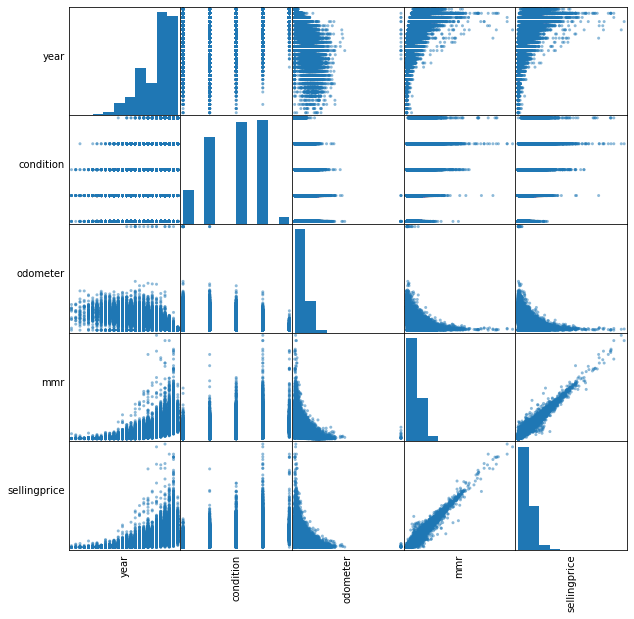

In [0]:
import pandas as pd
numeric_features = [t[0] for t in dfreal.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dfreal.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
import six
for i in dfreal.columns:
    if not( isinstance(dfreal.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to sellingprice for ", i, dfreal.stat.corr('sellingprice',i))

Correlation to sellingprice for  year 0.6037693465588013
Correlation to sellingprice for  condition 0.5331359245591806
Correlation to sellingprice for  odometer -0.5889616470448344
Correlation to sellingprice for  mmr 0.9829229509732645
Correlation to sellingprice for  sellingprice 1.0


In [0]:
# Import the required libraries

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer, VectorAssembler
from pyspark.mllib.linalg import SparseVector
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.util import MLUtils



In [0]:
categorical_feature = {
  "make": 94,
  "model": 902,
  "trim": 1754,
  "body": 44,
  "transmission": 2,
  "state": 36,
  "color": 20,
  "interior": 17,
}

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import OneHotEncoder
#categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []
for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index',handleInvalid='keep')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
#label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
#stages += [label_stringIdx]

continous_columns = ['year', 'condition', 'odometer', 'mmr']
#featuresCols.remove('sellingprice')
#numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categorical_columns] + continous_columns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
stages

Out[29]: [StringIndexer_fd85b2e7e73a,
 OneHotEncoder_62cd2556b864,
 StringIndexer_7b0f7de7066e,
 OneHotEncoder_603595fa6ea5,
 StringIndexer_8123e7bc23c8,
 OneHotEncoder_53c6c00744b5,
 StringIndexer_15e54f470ddf,
 OneHotEncoder_5a9f409dc7a7,
 StringIndexer_cf63e47228ef,
 OneHotEncoder_da3efee76e8a,
 StringIndexer_153d1b945fe4,
 OneHotEncoder_d2d02bff2c18,
 StringIndexer_8c36fddda1fb,
 OneHotEncoder_c9bdb1b2cb00,
 StringIndexer_a136c9a48b4a,
 OneHotEncoder_cc0ca94f8845,
 VectorAssembler_487e2ea61022]

In [0]:
from pyspark.ml.feature import StringIndexer
#Use StringIndexer to convert the categorical columns to hold numerical data
stages = []
stages += [StringIndexer(inputCol='make',outputCol='make_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='model',outputCol='model_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='trim',outputCol='trim_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='body',outputCol='body_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='transmission',outputCol='transmission_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='state',outputCol='state_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='condition',outputCol='condition_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='color',outputCol='color_group_index',handleInvalid='keep')]
stages += [StringIndexer(inputCol='interior',outputCol='interior_index',handleInvalid='keep')]

In [0]:
pipeline = Pipeline(stages = stages)
#fit the pipeline to our dataframe
pipelineModel = pipeline.fit(dfreal)
#transform the dataframe
dfreal = pipelineModel.transform(dfreal)
dfreal.head()

Out[31]: Row(year=2015, make='Kia', model='Sorento', trim='LX', body='SUV', transmission='automatic', state='ca', condition=5, odometer=16639, color='white', interior='black', mmr=20500, sellingprice=21500, make_index=8.0, model_index=38.0, trim_index=2.0, body_index=1.0, transmission_index=0.0, state_index=0.0, condition_index=4.0, color_group_index=1.0, interior_index=0.0)

In [0]:
# Create a 70-30 train test split

train_data,test_data=dfreal.randomSplit([0.7,0.3])

In [0]:
print(dfreal.columns)

['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'make_index', 'model_index', 'trim_index', 'body_index', 'transmission_index', 'state_index', 'condition_index', 'color_group_index', 'interior_index']


In [0]:
#from pyspark.ml.feature import VectorAssembler
featuresCols = dfreal.columns
featuresCols.remove('sellingprice')
featuresCols.remove('make')
featuresCols.remove('model')
featuresCols.remove('body')
featuresCols.remove('trim')
featuresCols.remove('transmission')
featuresCols.remove('state')
featuresCols.remove('condition')
featuresCols.remove('color')
featuresCols.remove('interior')
featuresCols.remove('trim_index')
featuresCols.remove('model_index')
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=1754)


In [0]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(labelCol="sellingprice", maxBins = 94)


In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

paramGrid = ParamGridBuilder().addGrid(gbt.maxDepth, [2, 5]).addGrid(gbt.maxIter, [10, 100]).build()

evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])


In [0]:

pipelineModel = pipeline.fit(train_data)

/databricks/spark/python/pyspark/ml/util.py:839: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)
/databricks/spark/python/pyspark/ml/util.py:86: UserWarning: CrossValidator_8a706678a1f7 fit call failed but some spark jobs may still running for unfinished trials. To address this issue, you should enable pyspark pinned thread mode.
  warnings.warn("{} fit call failed but some spark jobs "


---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
<command-627543753554565> in <module>
----> 1 pipelineModel = pipeline.fit(train_data)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method(self, *args, **kwargs)
     28             call_succeeded = False
     29             try:
---> 30                 result = original_method(self, *args, **kwargs)
     31                 call_succeeded = True
     32                 return result

/databricks/spark/python/pyspark/ml/base.py in fit(self, dataset, params)
    159                 return self.copy(params)._fit(dataset)
    160             else:
--> 161                 return self._fit(dataset)
    162         else:
    163             raise TypeError("Params must be either a param map or a list/tuple of param maps, "

/databricks/spark/python/pyspark/ml/pipeline.py in _fit(self, dataset)
    112  

In [0]:
# Store the results in a dataframe

results = fit_model.transform(test_data)
display(results)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-3699748957008436> in <module>
      1 # Store the results in a dataframe
      2 
----> 3 results = fit_model.transform(test_data)
      4 display(results)

NameError: name 'fit_model' is not defined

In [0]:
#results.show()
results.select(['sellingprice','prediction']).show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-3699748957008437> in <module>
      1 #results.show()
----> 2 results.select(['sellingprice','prediction']).show()

NameError: name 'results' is not defined

In [0]:
#And evaluate how well is our model doing. Our metrics will be RMSE, MSE, MAE and R^2.

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="sellingprice", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(results)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(results, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(results, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(results, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-3699748957008438> in <module>
      5 
      6 # Root Mean Square Error
----> 7 rmse = eval.evaluate(results)
      8 print("RMSE: %.3f" % rmse)
      9 

NameError: name 'results' is not defined

In [0]:
eval.explainParams()

Out[46]: 'labelCol: label column name. (default: label, current: sellingprice)\nmetricName: metric name in evaluation - one of:\n                       rmse - root mean squared error (default)\n                       mse - mean squared error\n                       r2 - r^2 metric\n                       mae - mean absolute error\n                       var - explained variance. (default: rmse, current: rmse)\npredictionCol: prediction column name. (default: prediction, current: prediction)\nthroughOrigin: whether the regression is through the origin. (default: False)\nweightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)'